# Question 1

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [91]:
index = np.arange(0,52,2)

s = pd.Series((index ** 2) - 1, index=index)
s[index % 3 == 0] = 0
s

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

# Question 2

In [92]:
def update(p,d):
    if np.random.binomial(1,p):
        d += 1
    else:
        d -= 1
    return d

def q2(p=0.5, d=100):
    
    index = pd.date_range(start='2000-01-01', end='2000-12-31')
    stocks = pd.Series(0 ,index)
    
    stocks[0] = d
    
    
    for i in range(len(stocks)-1):
        stocks[i+1] = update(p, stocks[i])
        if stocks[i+1] <= 0:
            stocks[i+1] = 0
            
    return stocks

In [93]:
q2(p=0.3, d=100)
q2(p=0.8, d=100)
q2(p=0.3, d=10)
q2(p=0.8, d=10)

2000-01-01     10
2000-01-02     11
2000-01-03     12
2000-01-04     13
2000-01-05     14
2000-01-06     15
2000-01-07     14
2000-01-08     15
2000-01-09     14
2000-01-10     15
2000-01-11     16
2000-01-12     17
2000-01-13     16
2000-01-14     17
2000-01-15     18
2000-01-16     19
2000-01-17     20
2000-01-18     21
2000-01-19     22
2000-01-20     21
2000-01-21     22
2000-01-22     23
2000-01-23     24
2000-01-24     25
2000-01-25     24
2000-01-26     25
2000-01-27     26
2000-01-28     27
2000-01-29     28
2000-01-30     27
             ... 
2000-12-02    194
2000-12-03    195
2000-12-04    196
2000-12-05    197
2000-12-06    198
2000-12-07    199
2000-12-08    200
2000-12-09    199
2000-12-10    200
2000-12-11    199
2000-12-12    200
2000-12-13    201
2000-12-14    202
2000-12-15    203
2000-12-16    204
2000-12-17    205
2000-12-18    206
2000-12-19    207
2000-12-20    208
2000-12-21    209
2000-12-22    210
2000-12-23    211
2000-12-24    210
2000-12-25    211
2000-12-26

# Question 3

In [94]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 
        'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 
                            'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 
                              'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 
                             'Math_Major': major})

In [95]:
studentInfo[studentInfo['Age'] > 19][studentInfo['Sex']=='M'][['ID','Name']]

# SELECT ID, Name from 
# WHERE Age > 19 AND Sex = 'M'

/Users/alexweinberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name
0,0,Mylan
6,6,Matt


# Question 4

In [140]:
df = pd.merge(studentInfo[studentInfo['Sex']=='M'] ,otherInfo, on='ID')[['ID','Age','GPA']]
df = df[df['Age']>19]
df

,ID,Age,GPA
0,0,20,3.8
3,6,20,3.8


# Question 5

top 5 years in decending order of crime amount

1980
1991
1981
1990
1989

Special years

1973
1974


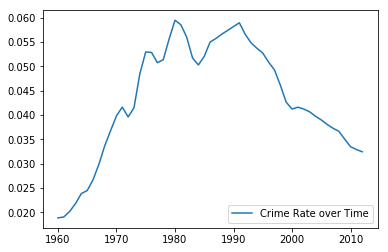

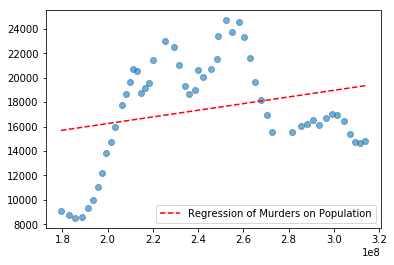

In [204]:
df = pd.read_csv('crime_data.txt', skiprows = [0], index_col=0)

# new column, crime rate
df = df.assign(Crime_Rate=(df['Total'] / df['Population']))

fig, ax = plt.subplots(1,1)
plt.plot(df.index, df['Crime_Rate'])
ax.legend(['Crime Rate over Time'])


# top 5 years in decending order of crime amount
cr = df.sort_values(['Crime_Rate'])[-5:][::-1]
print('top 5 years in decending order of crime amount\n')
[print(i) for i in cr.index.values]

# Calculate the average number of total crimes 
# as well as burglary crimes between 1960 and 2012.

avg_tot = df['Total'].mean()
avg_burg = df['Burglary'].mean()

# Find the years for which the total number of crimes was 
# below average, but the number of burglaries was above average.

myYears = df.loc[(df['Total'] < avg_tot) & (df['Burglary'] > avg_burg)]
print('\nSpecial years\n')
[print(i) for i in myYears.index.values]

regression = linregress(df['Population'], df['Murder'])
slope, intercept = regression[0], regression[1]

fig1, ax1 = plt.subplots(1,1)
plt.scatter(df['Population'], df['Murder'], alpha=0.6)
plt.plot(df['Population'], intercept + slope * df['Population'],'r--')
ax1.legend(['Regression of Murders on Population'])

df_out = df[['Population', 'Violent', 'Robbery']]

idx = [1979 < i < 1990 for i in df_out.index.values]
df_out = df_out.iloc[idx,:]
df_out.to_csv('crime_subset.csv')

# Question 6

Do again because I accidentally erased